In [1]:
# load standard libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
raw_data = pd.read_pickle("crime.pickle")
dct = {"Longitude": "longitude", "Latitude": "latitude", "LSOA name": "LSOA", "Crime type": "crime_type", 
           "magp": "median_income", "avg age": "avg_age", "Borough": "borough", "Cluster": "cluster", "Season": "season"}
raw_data.rename(columns=dct, inplace=True)

In [3]:
raw_data["yearly"] = raw_data.groupby(["year"])["crime_type"].transform("count")
raw_data["monthly"] = raw_data.groupby(["year", "month"])["crime_type"].transform("count")

In [4]:
data = raw_data[(raw_data["year"] != 2019) & (raw_data["year"] != 2010)]

In [16]:
x = data.sort_values(["month", "year"], ascending=(True, True))

In [17]:
plotter = x.set_index(["year"])

In [18]:
# x

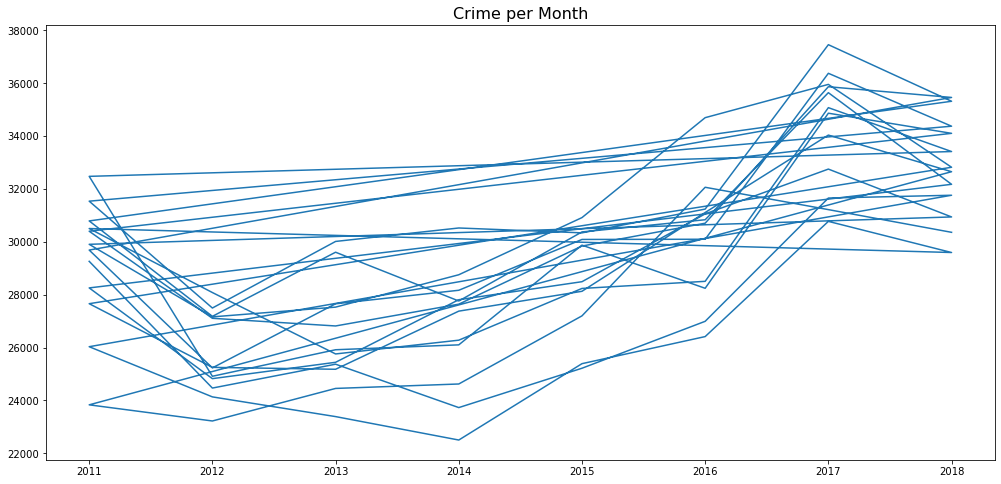

In [19]:
plt.figure(figsize=(17,8))
plt.plot(plotter.monthly)
plt.title("Crime per Month", size=16)
plt.show()

In [31]:
# raw_data[(raw_data.month==1) &  (raw_data.year==2017)]["monthly"].unique()

In [5]:
# cluster_set = raw_data[~ (raw_data["year"] == 2018) & ~(raw_data["year"] == 2019)]
# test_set =  raw_data[(raw_data["year"] == 2018) | (raw_data["year"] == 2019)]

In [6]:
# cluster_jan = cluster_set[cluster_set["month"] == 1]
# cluster_feb = cluster_set[cluster_set["month"] == 2]
# cluster_mar = cluster_set[cluster_set["month"] == 3]
# cluster_apr = cluster_set[cluster_set["month"] == 4]
# cluster_may = cluster_set[cluster_set["month"] == 5]
# cluster_jun = cluster_set[cluster_set["month"] == 6]
# cluster_jul = cluster_set[cluster_set["month"] == 7]
# cluster_aug = cluster_set[cluster_set["month"] == 8]
# cluster_sep = cluster_set[cluster_set["month"] == 9]
# cluster_okt = cluster_set[cluster_set["month"] == 10]
# cluster_nov = cluster_set[cluster_set["month"] == 11]
# cluster_dec = cluster_set[cluster_set["month"] == 12]

In [23]:
x.reset_index(inplace=True)

In [28]:
def seasonal_data(df):
    spring = df[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5)]
    summer = df[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]
    fall = df[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)]
    winter = df[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)]
    return spring, summer, fall, winter

def locational_data(df, x='longitude', y='latitude'):
    return df[[x, y]]

In [29]:
spring, summer, fall, winter = seasonal_data(x)

In [30]:
spring_loc = locational_data(spring)
summer_loc = locational_data(summer)
fall_loc = locational_data(fall)
winter_loc = locational_data(winter)
cluster_loc = locational_data(x)

In [31]:
# spring, summer, fall, winter = seasonal_data(cluster_set)

In [32]:
# loc_jan = locational_data(cluster_jan)
# loc_feb = locational_data(cluster_feb)
# loc_mar = locational_data(cluster_mar)
# loc_apr = locational_data(cluster_apr)
# loc_may = locational_data(cluster_may)
# loc_jun = locational_data(cluster_jun)
# loc_jul = locational_data(cluster_jul)
# loc_aug = locational_data(cluster_aug)
# loc_sep = locational_data(cluster_sep)
# loc_okt = locational_data(cluster_okt)
# loc_nov = locational_data(cluster_nov)
# loc_dec = locational_data(cluster_dec)

In [35]:
def sampler(df, x="Longitude", y="Latitude", frc=0.1):
    """samples data"""
    sample_loc = df.sample(frac=frc, random_state=42)
    return sample_loc

In [38]:
sample_loc = sampler(cluster_loc, frc=0.1)

In [39]:
sample_loc

,longitude,latitude
1139959,-2.627842,53.558025
1181915,-2.439862,53.588023
2392369,-2.218666,53.408090
1554615,-2.161859,53.596416
644772,-2.467365,53.555929
...,...,...
1608972,-2.305349,53.405033
875813,-2.371520,53.507009
2094454,-2.434386,53.582812
1649268,-2.429767,53.603960


In [5]:
# import datashader as ds
# from datashader.mpl_ext import dsshow
# import pandas as pd


# def using_datashader(ax, x, y, mx=80):
#     df = pd.DataFrame(dict(x=x, y=y))
#     dsartist = dsshow(
#         df,
#         ds.Point("x", "y"),
#         ds.count(),
#         vmin=0,
#         vmax=mx,
#         norm="linear",
#         aspect="auto",
#         ax=ax,
#     )

#     plt.colorbar(dsartist)


# # fig, ax = plt.subplots()
# # using_datashader(ax, loc_x, loc_y)
# # fig.set_size_inches(18.5, 10.5)

# # ax.annotate('axes fraction',
# #             xy=(-2.22, 53.48),
# #             xytext=(-2.22, 53.48), textcoords='X')

# # # Clusters:
# # # (-2.18, 53.63)
# # # (-2.13, 53.54)
# # # (-2.1, 53.48) - klein
# # # (-2.28, 53.58)
# # # (-2.42, 53.57)

# # plt.text(-2.2425, 53.48, "X", size=16, weight='bold')
# # plt.text(-2.167, 53.615, "X", size=14)
# # plt.text(-2.123, 53.54, "X", size=14)
# # plt.text(-2.3, 53.59, "X", size=14)
# # plt.text(-2.438, 53.576, "X", size=14)
# # plt.text(-2.1, 53.49, "X", size=12)

# # plt.show()

In [40]:
# fig, ax = plt.subplots()
# using_datashader(ax, sample_loc.Longitude, sample_loc.Latitude, mx=50)
# fig.set_size_inches(16, 10)

# # ax.annotate('axes fraction',
# #             xy=(-2.22, 53.48),
# #             xytext=(-2.22, 53.48), textcoords='X')

# # # # Clusters:
# # # (-2.18, 53.63)
# # # (-2.13, 53.54)
# # # (-2.1, 53.48) - #klein
# # # (-2.28, 53.58)
# # # (-2.42, 53.57)

# plt.text(-2.2425, 53.48, "X", size=16, weight='bold')
# plt.text(-2.167, 53.615, "X", size=14)
# plt.text(-2.123, 53.54, "X", size=14)
# plt.text(-2.3, 53.59, "X", size=14)
# plt.text(-2.438, 53.576, "X", size=14)
# plt.text(-2.1, 53.49, "X", size=12)

# plt.show();

In [41]:
# # plotting spring
# fig, ax = plt.subplots()
# using_datashader(ax, spring_loc.Longitude, spring_loc.Latitude, mx=120)
# fig.set_size_inches(16, 10)

# # plt.text(-2.248, 53.475, "X", size=16, weight='bold')
# # plt.text(-2.167, 53.615, "X", size=14)
# # plt.text(-2.123, 53.54, "X", size=14)
# # plt.text(-2.3, 53.59, "X", size=14)
# # plt.text(-2.438, 53.576, "X", size=14)
# # plt.text(-2.1, 53.487, "X", size=12)

# plt.show()

In [42]:
# # plotting summer
# fig, ax = plt.subplots()
# using_datashader(ax, summer_loc.Longitude, summer_loc.Latitude, mx=300)
# fig.set_size_inches(16, 10)

# plt.show()

In [45]:
def main_hotspot_grid(df, x1=-2.22, x2=-2.26, y1=53.46, y2=53.49):
    return df[(df['latitude'] > y1) & (df['latitude'] < y2) & (df['longitude'] > x2) & (df['longitude'] < x1)]

In [46]:
print('The following holds for the data')
hotspot = main_hotspot_grid(sample_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(sample_loc)} data points')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(sample_loc)/len(hotspot))}')

The following holds for the data
There are roughly 21974 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 280872 data points
The minimum number of clusters from this simple calculation would be: 13


In [20]:
# print('The following holds for summer')
# hotspot = main_hotspot_grid(summer_loc)
# print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
# print(f'There is a total of {len(summer_loc)} data points in the summer data set')
# print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(summer_loc)/len(hotspot))}')

In [21]:
# spring_array = np.array(spring_loc)
# summer_array = np.array(summer_loc)

In [47]:
clusters_array = np.array(sample_loc)

In [22]:
# pip install --upgrade numpy

In [48]:
from k_means_constrained import KMeansConstrained

clf_clusters = KMeansConstrained(
     n_clusters=13,
     size_min=None,
     size_max=22000,
     random_state=42,
     n_jobs=-1
)
clf_clusters.fit_predict(clusters_array)
print(clf_clusters.cluster_centers_)
print(clf_clusters.labels_)

# sample_labels = clf_clusters.labels_

# clf_spring = KMeansConstrained(
#      n_clusters=12,
#      size_min=None,
#      size_max=65000,
#      random_state=15,
#      n_jobs=-1
# )
# clf_spring.fit_predict(spring_array)
# print(clf_spring.cluster_centers_)
# print(clf_spring.labels_)

[[-2.25861148 53.4061789 ]
 [-2.18315845 53.49690267]
 [-2.41355097 53.56987522]
 [-2.16535841 53.60112566]
 [-2.07933277 53.46887962]
 [-2.63131036 53.53527499]
 [-2.29235478 53.56502867]
 [-2.22720111 53.46295466]
 [-2.33338003 53.45539832]
 [-2.48461361 53.52414889]
 [-2.24863001 53.48851903]
 [-2.15914153 53.41122568]
 [-2.10628626 53.54306466]]
[5 2 0 ... 2 2 0]


In [27]:
# print("Hello")

Hello


In [49]:
sample_labels = clf_clusters.labels_

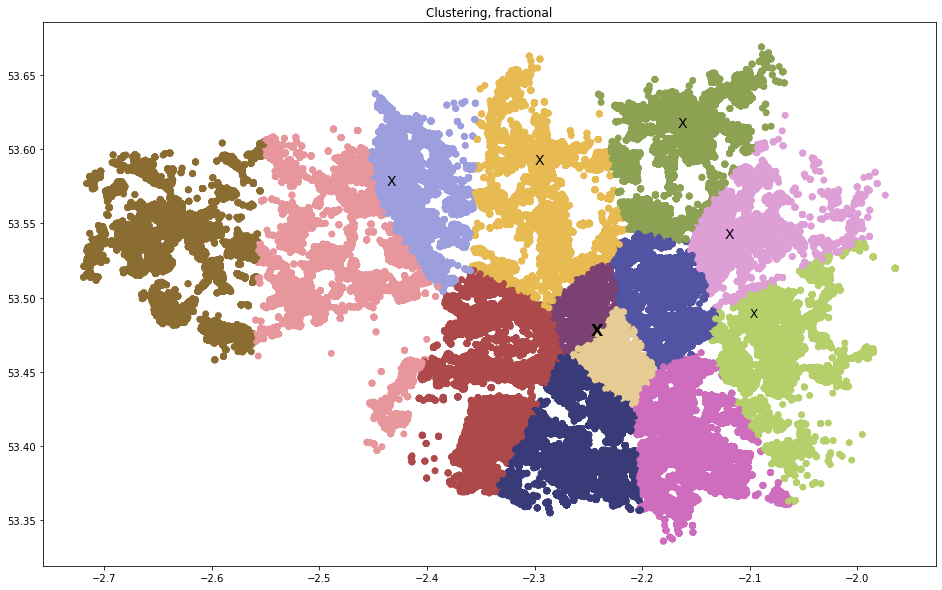

In [50]:
# plotting spring clusters
fig, ax = plt.subplots()
ax.scatter(x=sample_loc.longitude, y=sample_loc.latitude, c=sample_labels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.title("Clustering, fractional")
plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)

plt.show()

In [51]:
# predict = clf_clusters.predict()
# predict

sample_labels

array([5, 2, 0, ..., 2, 2, 0])

In [52]:
sample_loc['cluster'] = pd.Series(sample_labels.copy(), index=sample_loc.index)

In [53]:
sample_loc

,longitude,latitude,cluster
1139959,-2.627842,53.558025,5
1181915,-2.439862,53.588023,2
2392369,-2.218666,53.408090,0
1554615,-2.161859,53.596416,3
644772,-2.467365,53.555929,9
...,...,...,...
1608972,-2.305349,53.405033,0
875813,-2.371520,53.507009,8
2094454,-2.434386,53.582812,2
1649268,-2.429767,53.603960,2


In [54]:
from sklearn.model_selection import train_test_split

data_x = sample_loc.drop("cluster", axis=1)
data_y = sample_loc["cluster"]

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# errors = [mean_squared_error(y_test, y_pred)
#           for y_pred in gbrt.staged_predict(X_test)]
# bst_n_estimators = np.argmin(errors) + 1

# gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
# # gbrt_best.fit(X_train, y_train)

In [57]:
y_pred = gbrt.predict(X_test)

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

prec_score = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec_score = recall_score(y_test, y_pred, average="weighted", zero_division=0)
F1_score = f1_score(y_test, y_pred, average="weighted", zero_division=0)
acc_score = accuracy_score(y_test, y_pred)

print(f'The accuracy of the model is {round(acc_score, 4)}.')
print(f'The precision of the model is {round(prec_score, 4)}, using weighted average.')
print(f'The recall of the model is {round(rec_score, 4)}, using weighted average.')
print(f'The f1-score of the model is {round(F1_score, 4)} using weighted average.')

The accuracy of the model is 0.9954.
The precision of the model is 0.9954, using weighted average.
The recall of the model is 0.9954, using weighted average.
The f1-score of the model is 0.9954 using weighted average.


In [59]:
loc_test = locational_data(data)

In [60]:
test_predict = gbrt.predict(loc_test)

In [61]:
test_predict

array([6, 6, 6, ..., 5, 5, 5])

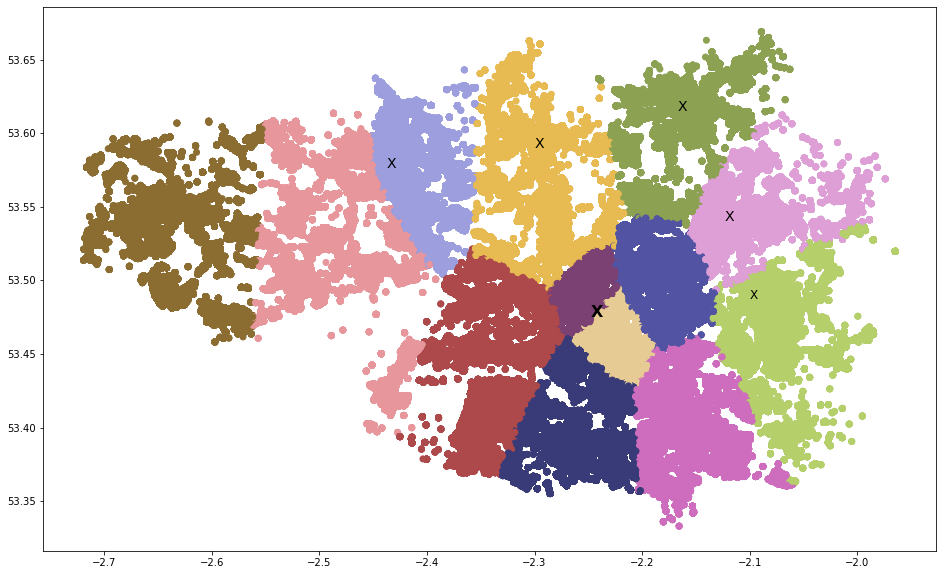

In [63]:
# plotting spring clusters
fig, ax = plt.subplots()
ax.scatter(x=loc_test.longitude, y=loc_test.latitude, c=test_predict, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)

plt.show()

In [65]:
data['cluster'] = pd.Series(test_predict.copy(), index=data.index)

C:\Users\Jarl\AppData\Local\Temp\ipykernel_16584\2486056911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = pd.Series(test_predict.copy(), index=data.index)


In [66]:
data

,Reported by,Falls within,longitude,latitude,LSOA code,LSOA,crime_type,year,month,borough,median_income,avg_age,count,code,yearly,monthly,cluster
30201,Greater Manchester Police,Greater Manchester Police,-2.241839,53.533839,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6
30202,Greater Manchester Police,Greater Manchester Police,-2.236030,53.536556,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6
30203,Greater Manchester Police,Greater Manchester Police,-2.233968,53.537343,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6
30204,Greater Manchester Police,Greater Manchester Police,-2.229789,53.534708,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6
30205,Greater Manchester Police,Greater Manchester Police,-2.236030,53.536556,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841161,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,E01006347,Wigan 040E,Anti-social behaviour,2018,12,Wigan,25122,45.244834,5,01006347,393021,30362,5
2841162,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,E01006347,Wigan 040E,Burglary,2018,12,Wigan,25122,45.244834,5,01006347,393021,30362,5
2841163,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,E01006347,Wigan 040E,Burglary,2018,12,Wigan,25122,45.244834,5,01006347,393021,30362,5
2841164,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,E01006347,Wigan 040E,Vehicle crime,2018,12,Wigan,25122,45.244834,5,01006347,393021,30362,5


In [67]:
# data = test_set.copy()
data.rename(columns={"Reported by": "reported_by", "Falls within": "falls_withing", "Crime type": "crime_type", "avg age": "avg_age", "magp": "median_income"}, inplace=True)

# df.rename(columns={"A": "a", "B": "c"})

C:\Users\Jarl\AppData\Local\Temp\ipykernel_16584\2636038689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Reported by": "reported_by", "Falls within": "falls_withing", "Crime type": "crime_type", "avg age": "avg_age", "magp": "median_income"}, inplace=True)


In [89]:
# def seasonal_data(df):
#     spring = df[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5)]
#     summer = df[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]
#     fall = df[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)]
#     winter = df[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)]
# #     df["season"] = 
#     return df

In [90]:
# spring, summer, fall, winter = seasonal_data(data)

In [68]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [69]:
season_list = []
hemisphere = 'Northern'
for month in data.month:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
data['season'] = season_list

C:\Users\Jarl\AppData\Local\Temp\ipykernel_16584\3592260886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = season_list


In [70]:
data.head()

,reported_by,falls_withing,longitude,latitude,LSOA code,LSOA,crime_type,year,month,borough,median_income,avg_age,count,code,yearly,monthly,cluster,season
30201,Greater Manchester Police,Greater Manchester Police,-2.241839,53.533839,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6,Winter
30202,Greater Manchester Police,Greater Manchester Police,-2.236030,53.536556,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6,Winter
30203,Greater Manchester Police,Greater Manchester Police,-2.233968,53.537343,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6,Winter
30204,Greater Manchester Police,Greater Manchester Police,-2.229789,53.534708,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6,Winter
30205,Greater Manchester Police,Greater Manchester Police,-2.236030,53.536556,E01005098,Manchester 001A,Anti-social behaviour,2011,1,Manchester,26261,40.501953,23,01005098,350369,29264,6,Winter


In [71]:
data.to_pickle("clustered.pkl")

In [72]:
df = pd.read_pickle("clustered.pkl")

In [96]:
crime_count = df.groupby(['year', 'month', 'Cluster'])['Latitude'].transform('count')

In [97]:
df['count'] = [int(num) for num in crime_count]

In [98]:
df.head()

,reported_by,falls_withing,Longitude,Latitude,LSOA code,LSOA name,crime_type,year,month,Borough,median_income,avg_age,count,code,Cluster,Season
2453137,Greater Manchester Police,Greater Manchester Police,-2.232573,53.536159,E01005098,Manchester 001A,Anti-social behaviour,2018,1,Manchester,29997,39.262105,2633,01005098,11,Winter
2453138,Greater Manchester Police,Greater Manchester Police,-2.241839,53.533839,E01005098,Manchester 001A,Anti-social behaviour,2018,1,Manchester,29997,39.262105,2633,01005098,11,Winter
2453139,Greater Manchester Police,Greater Manchester Police,-2.240892,53.534443,E01005098,Manchester 001A,Anti-social behaviour,2018,1,Manchester,29997,39.262105,2633,01005098,11,Winter
2453140,Greater Manchester Police,Greater Manchester Police,-2.236030,53.536556,E01005098,Manchester 001A,Anti-social behaviour,2018,1,Manchester,29997,39.262105,2633,01005098,11,Winter
2453141,Greater Manchester Police,Greater Manchester Police,-2.239317,53.536047,E01005098,Manchester 001A,Anti-social behaviour,2018,1,Manchester,29997,39.262105,2633,01005098,11,Winter


In [99]:
df.Cluster.value_counts()

3     50228
0     48563
13    48070
11    44797
8     44646
6     41602
1     40460
14    39723
12    38135
5     35939
9     34065
10    31960
7     30399
2     29898
4     27735
Name: Cluster, dtype: int64